In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import datetime
from matplotlib.pyplot import rcParams
warnings.filterwarnings('ignore')

In [97]:
rcParams['figure.figsize']  = 16,5
rcParams['lines.linewidth'] = 2.8
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'
rcParams['axes.grid'] = True
rcParams['axes.linewidth'] = 0.2
plt.rc('axes',axisbelow=True)
plt.rc('axes.spines',top=False,bottom=False,left=False,right=False)
pd.options.display.max_columns = 46
palette = ['#07BEB8','#3F88C5','#98DFEA','#392B58','#645E9D','#4c2f60']

In [98]:
df = pd.read_csv("D:/Dibimbing/Dataset/insuranceFraud.csv",na_values=['?','None']) # setelah melihat sekilas beberapa nilai yang ada, saya mendefinisikan "?" dan "None" sebagai missing values
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698         9/6/2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455         6/6/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0     1/25/2015  Single Vehicle Collision   Side Collision      Major Damage   
1     1/21/2015             Vehicle Theft              NaN      Minor Damage   
2     2/22/2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3     1/10/2015  Single Vehicle Collision  Front Collision      Major Damage   
4     2/17/2015             Vehicle Theft              NaN      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1             NaN   
2                         7                            3              NO   
3                         5                            1             NaN   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                     NaN                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [99]:
df.sample(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
414                 210   39         620020        6/21/1997           OH   
291                  59   40         444422        9/28/2011           IL   
741                 100   33         507452        4/17/2005           OH   
390                  48   35         890026        5/16/2008           IL   
763                  66   30         984456        6/24/2003           IN   
812                 404   56         485813         4/7/2010           IN   
94                  271   42         307447        3/17/1990           IL   
294                 156   37         384618         2/9/1993           IN   
237                 107   26         261119        3/21/1997           IL   
945                 412   56         728600        8/15/2002           IL   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
414   500/1000               1000                 984.45               0   
291    250/500               2000                 782.23               0   
741    250/500                500                1124.59         6000000   
390    100/300                500                1090.03               0   
763   500/1000                500                 484.67               0   
812    250/500               1000                1361.16         4000000   
94     100/300                500                1515.30               0   
294    250/500                500                1090.65               0   
237   500/1000               2000                 932.14               0   
945    250/500                500                1042.56               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
414       474998        MALE               Associate       armed-forces   
291       449221        MALE                 College    protective-serv   
741       459428        MALE                 College       adm-clerical   
390       430232      FEMALE                      JD    exec-managerial   
763       608309      FEMALE                 College       adm-clerical   
812       437944      FEMALE                 Masters   transport-moving   
94        603248      FEMALE             High School  machine-op-inspct   
294       608331        MALE             High School    exec-managerial   
237       612550        MALE                      MD              sales   
945       616767        MALE             High School  handlers-cleaners   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
414       paintball            unmarried              0             0   
291            golf       other-relative          64200        -32300   
741            golf        not-in-family          67300             0   
390            golf            unmarried              0        -51000   
763       paintball                 wife          21100        -60800   
812       cross-fit        not-in-family              0        -63700   
94           hiking        not-in-family              0             0   
294            golf            unmarried              0        -51800   
237       cross-fit            own-child          40600             0   
945        yachting            own-child              0        -66100   

    incident_date             incident_type   collision_type  \
414      1/2/2015             Vehicle Theft              NaN   
291      2/6/2015   Multi-vehicle Collision  Front Collision   
741     2/26/2015  Single Vehicle Collision   Rear Collision   
390     1/30/2015  Single Vehicle Collision   Rear Collision   
763     1/24/2015   Multi-vehicle Collision  Front Collision   
812     1/15/2015  Single Vehicle Collision  Front Collision   
94      1/19/2015   Multi-vehicle Collision   Rear Collision   
294     1/16/2015   Multi-vehicle Collision   Rear Collision   
237     1/10/2015   Multi-vehicle Collision   Rear Collision   
945     1/20/2015   Multi-vehicle Collision  Front

# #1 Nilai null

In [100]:
df.isna().sum().sort_values(ascending=False)

property_damage                360
police_report_available        343
collision_type                 178
authorities_contacted           91
auto_model                       0
auto_make                        0
vehicle_claim                    0
property_claim                   0
injury_claim                     0
total_claim_amount               0
incident_severity                0
witnesses                        0
bodily_injuries                  0
auto_year                        0
number_of_vehicles_involved      0
incident_hour_of_the_day         0
incident_location                0
incident_city                    0
incident_state                   0
months_as_customer               0
age                              0
insured_zip                      0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit      

terdapat empat kolom yang memiliki *missing values*, yaitu **property damage, police_report_available**, **authorities_contacted** dan **collision_type** dengan masing - masing berjumlah 360, 343, 91, dan 178

# #2 Handling missing values

karena ketiga kolom yang memiliki missing values bertipe data kategorikal, kita bisa mengimpute nilai yang hilang menggunakan modus dari tiap kolom

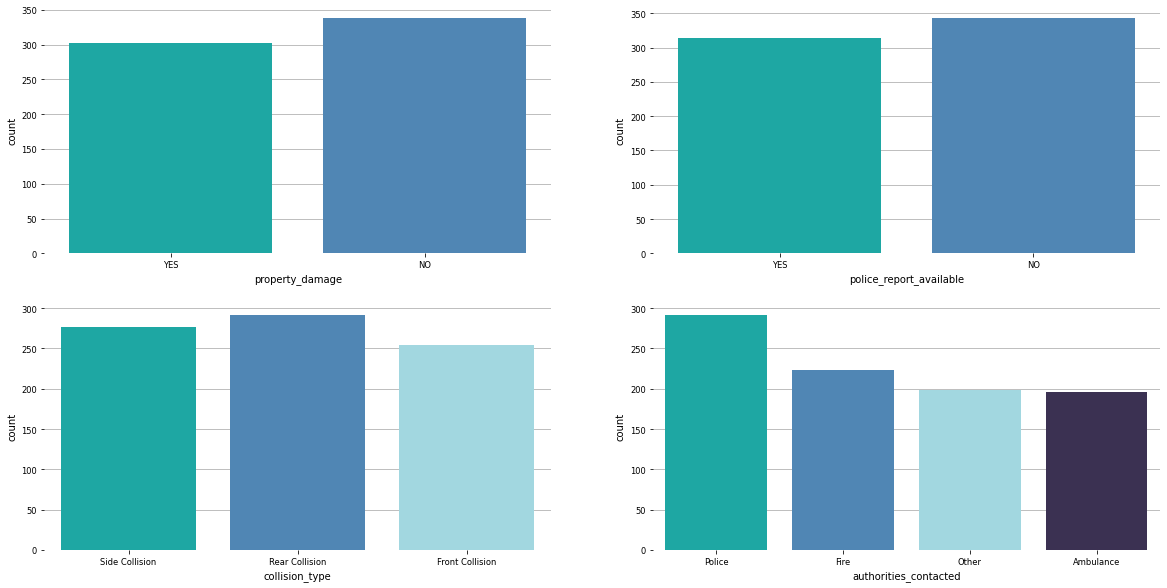

In [101]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

sns.countplot(df['property_damage'], ax=ax[0,0],palette=palette)
sns.countplot(df['police_report_available'], ax=ax[0,1],palette=palette)
sns.countplot(df['collision_type'], ax=ax[1,0],palette=palette)
sns.countplot(df['authorities_contacted'], ax=ax[1,1],palette=palette)
plt.show()

In [102]:
def input_missing_values(column_name):
    df[column_name].fillna(df[column_name].mode()[0], inplace=True)

In [103]:
input_missing_values('property_damage')
input_missing_values('police_report_available')
input_missing_values('collision_type')
input_missing_values('authorities_contacted')

Create year, month, day columns

In [104]:
df['year_polis'] = pd.to_datetime(df['policy_bind_date'], dayfirst=True).dt.year
df['month_polis'] = pd.to_datetime(df['policy_bind_date'], dayfirst=True).dt.month
df['day_polis'] = pd.to_datetime(df['policy_bind_date'], dayfirst=True).dt.day

# #3 Uni-multivariate analysis

## 3.1 Univariate analysis

In [105]:
def plot_numeric(column, num_ax, color=palette[1],data=df):
    sns.distplot(data[column],ax=ax[num_ax], color=color)
    ax[num_ax].grid(alpha=0.4)
    ax[num_ax].set_xlabel('')
    ax[num_ax].set_ylabel('')
    ax[num_ax].set_title(column,fontweight=550)

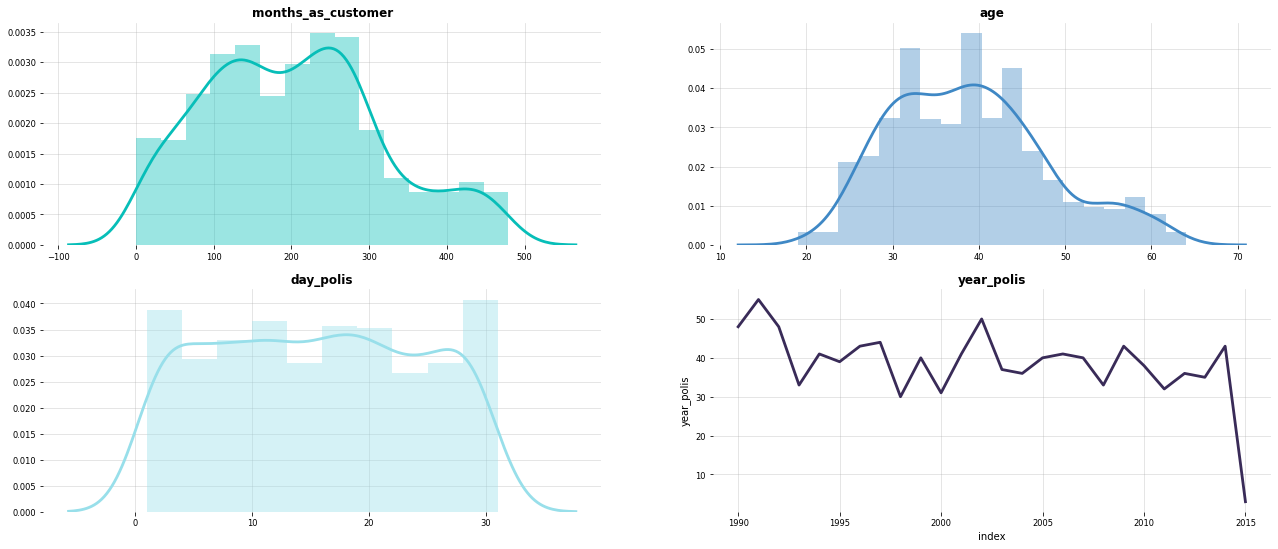

In [106]:
fig, ax  = plt.subplots(2,2, figsize=(22,9))

num_col2 = ['months_as_customer','age','day_polis','year_polis']
for a,b,c in zip(num_col2[:-1],[(0,0),(0,1),(1,0)], palette):
    plot_numeric(a,b,c)
sns.lineplot('index','year_polis',data=df['year_polis'].value_counts().sort_index().to_frame().reset_index(),ax=ax[1,1],color=palette[3])
ax[1,1].set_title('year_polis',fontweight=550)
plt.grid(alpha=0.4)

Dari distribusi data di atas terlihat bahwa sebagian besar customer:

- sudah menggunakan layanan bank di rentang 100 hingga 300 bulan
- berusia di rentang umur 25 hingga 46 tahun
- tanggal polis customer terlihat merata mulai dari awal hingga akhir bulan. Hal ini mengindikasikan bahwa tidak ada pola tertentu kontrak yang dimiliki customer pada data ini
- dari kolom year polis, terlihat data memiliki tren yang cukup fluktuatif dan terjadi penurunan yang cukup banyak pada tahun 2015

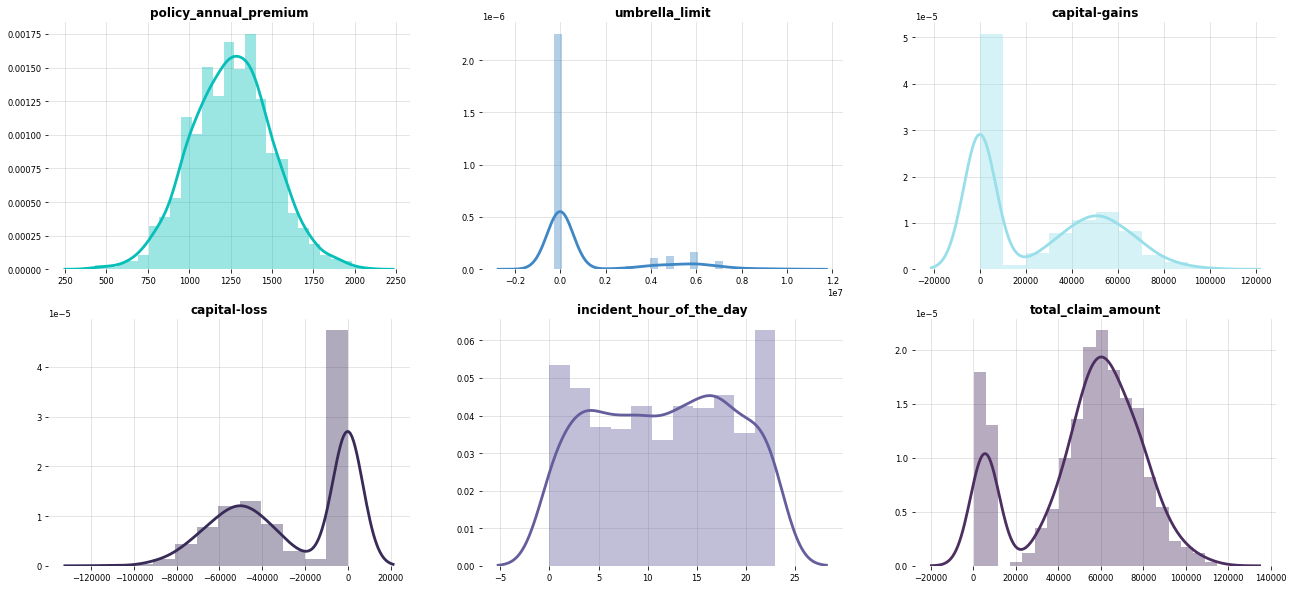

In [107]:
fig, ax  = plt.subplots(2,3, figsize=(22,10))
num_col  = ['policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','total_claim_amount']
num_ax   = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]

for a,b,c in zip(num_col,num_ax, palette):
    plot_numeric(a,b,c)

- Banyak dari customer tidak menerima ganti rugi ( capital gains and loss ) dari insiden yang terjadi. Untuk customer yang mendapat gains dan loss, sebagian besar dari mereka banyak mendapat di rentang antara 40000 dan 60000 ( positif dan negatif )
- Premi tahunan para customer banyak di rentang nilai 1000 hingga 1400
- Insiden yang terjadi pada customer paling banyak pada malam hari. Walaupun demikian, dari pagi hingga sore pun jumlah kecelakaan yang terjadi relatif cukup banyak
- Total klaim yang didapat para customer ada di rentang nilai 50000 hingga 80000. Akan tetapi, banyak juga customer yang tidak mendapat klaimnya, yang ditunjukkan oleh nilai 0 pada grafik di atas

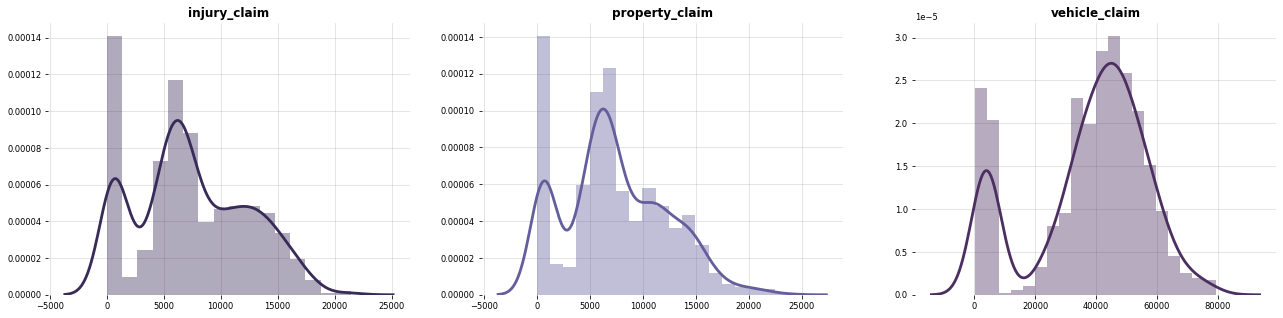

In [108]:
num_col1 = ['injury_claim','property_claim',"vehicle_claim"]
fig, ax  = plt.subplots(1,3, figsize=(22,5))
for x,y,z in zip(num_col1,[i for i in range(3)], palette[-3:]):
    plot_numeric(x,y,z)

sesuai dengan kolom "total_klaim" yang terlihat pada graph sebelumnya, banyak dari customer juga tidak mendapat klaim pada injury, property, dan vehicle. Namun demikian, pada kategori claim vehicle, customer yang mendapat klaim pada rentang 40000 hingga 500000 lebih banyak dibanding yang tidak mendapat klaim

total klaim yang didapat pada kategory injury dan property yang didapat customer memiliki jumlah yang mirip

In [109]:
def plot_categorical_v(column, axes,  color,order=None, hue=None):
    sns.countplot(x=df[column], ax=ax[axes], color=color, order=(df[column].value_counts().index if order == None else order),hue=hue)
    ax[axes].grid(alpha=0.4,axis='y')
    ax[axes].set_ylabel("")
    
def plot_categorical_h(column, axes, color,hue=None):
    sns.countplot(y=df[column], ax=ax[axes], color=color, order=df[column].value_counts().index,hue=hue)
    ax[axes].grid(alpha=0.4,axis='x')
    ax[axes].set_xlabel("")

In [110]:
v = ['policy_state', 'policy_csl', 'policy_deductable','insured_sex','incident_severity','collision_type']
h1 = ['insured_education_level','insured_occupation','insured_relationship', 'incident_type','authorities_contacted','incident_state']
h2 = ['incident_city', 'bodily_injuries','property_damage','witnesses','police_report_available','auto_make']
v1 = ['number_of_vehicles_involved','month_polis']

axes_list1 = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
axes_list2 = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]

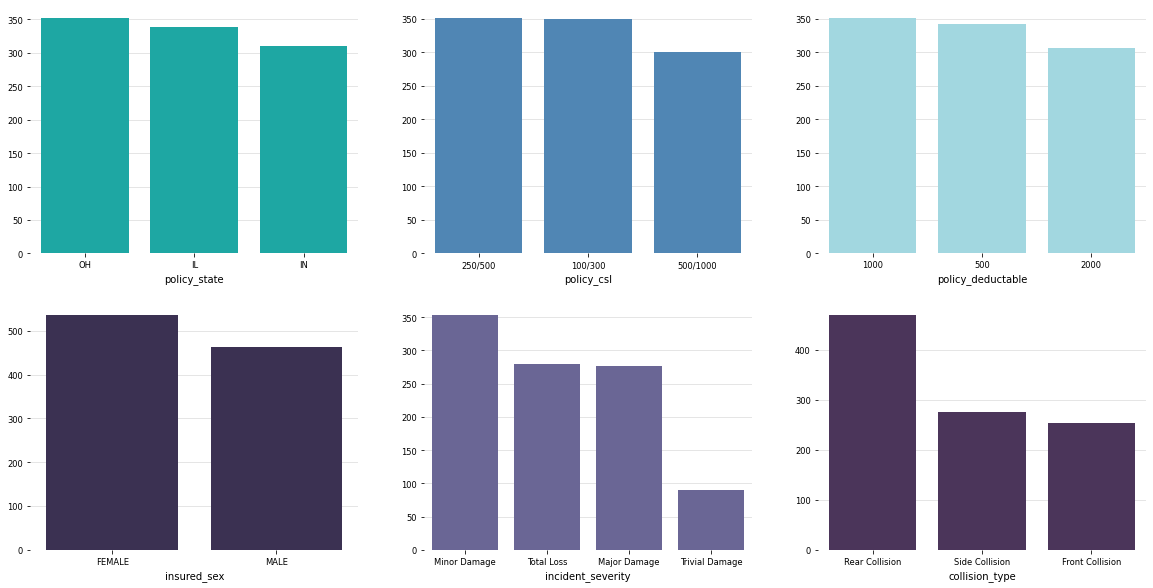

In [111]:
fig, ax  = plt.subplots(2,3,figsize=(20,10))
for a, b, c in zip(v, axes_list1, palette):
    plot_categorical_v(a,b,c)

Keenam variable di atas memiliki perbandingan jumlah count value yang tidak besar dengan value lainnya, kecuali pada kolom **incident_severity**. Sebagian besa customer:
1. berada di wilayah negara bagian Oklahoma
2. kolom **policy_csl** memiliki dua nilai terbanyak, yaitu 250/500 dan 100/300
3. 1000 dan 500 menjadi dua nilai yang paling sering muncul di kolom **policy_deductable**
4. customer banyak berjenis kelamin wanita
5. kecelakaan yang terjadi banyak masuk kategory minor damage
6. tipe tabrakan terbanyak berada di kategoru *Rear Collison* yang mana merupakan kecelakaan akibat kendaraan yang menabrak dari belakang kendaraan lain

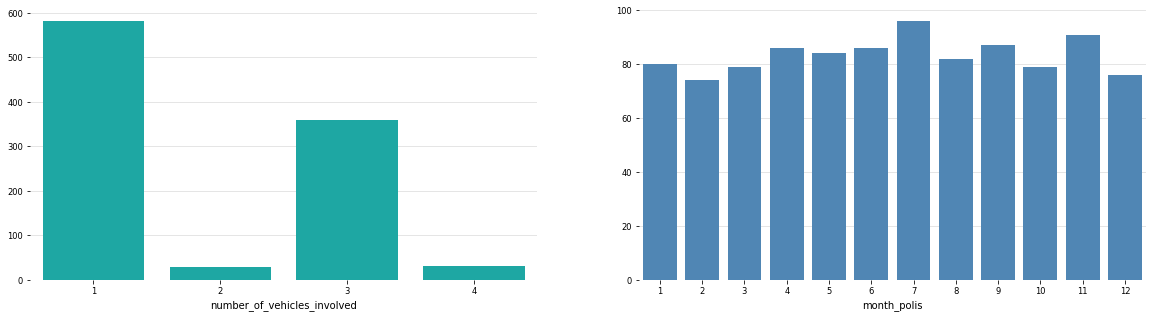

In [112]:
fig, ax  = plt.subplots(1,2,figsize=(20,5))
for a, b, c in zip(v1, [0,1], palette):
    plot_categorical_v(a,b,c, order = [i for i in range(1,df[a].nunique()+1)])

- Jumlah kendaraan yang terlibat pada kecelakaan dari data adalah satu
- Banyak customer memiliki tanggal kontrak polis di bulan Juli dan November

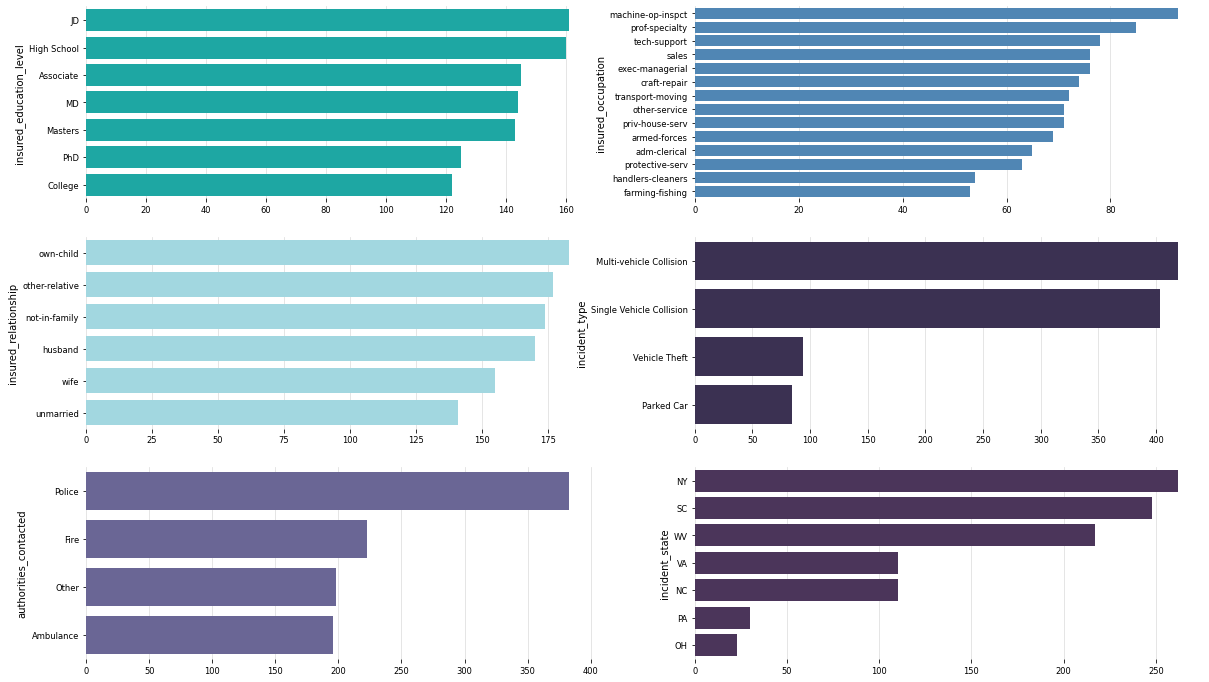

In [113]:
fig, ax  = plt.subplots(3,2,figsize=(20,12))
for d, e, f in zip(h1, axes_list2, palette):
    plot_categorical_h(d, e, f)

- Customer yang memiliki law degrees (JD) dan High School menjadi nilai dua terbanyak
- Pekerjaan para nasabah terlihat beragam dari data di atas dan *machine_op_insp* adalah pekerjaan yang paling banyak dimiliki oleh customer
- Insiden yang paling banyak terjadi berada di New York, sedangkan kecelakaan paling sedikit berada di Oklahoma. Walaupun Oklahoma menjadi wilayah polis terbanyak berdasarkan visualiasi graph sebelumnya, kecelakaan yang berada di negara bagian ini relatif sedikit dibanding wilayah yang lain. Hal ini dapat terindikasi bahwa banyak para customer mengalami kecelakaan saat bepergian jauh, perjalanan bisnis, ataupun rekreasi
- Banyak customer yang mengalami insiden terjadi di kategori tabrakan beruntun, diikuti dengan tipe insiden single, tanpa kendaraan lain yang terlibat

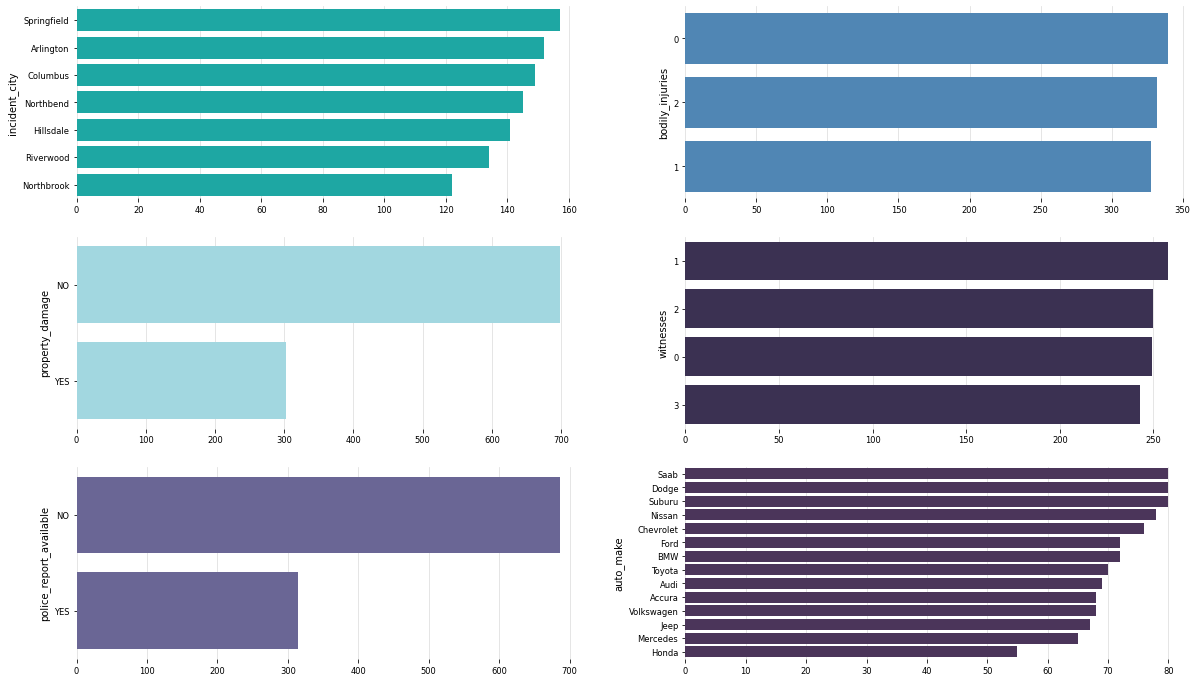

In [114]:
fig, ax  = plt.subplots(3,2,figsize=(20,12))
for d, e, f in zip(h2, axes_list2, palette):
    plot_categorical_h(d, e, f)

- banyak customer yang mengalami insiden tidak mengalami kerusakan property dan cedera badan, hal ini cukup masuk akal karena dari data sebelumnya, kebanyakan tipe insiden masuk kategori minor damage
- secara sekilas, walaupun sebagian besar dari insiden yang terjadi memiliki saksi, kebanyakan dari mereka tidak terdapat laporan dari pihak polisi

Dependent variable

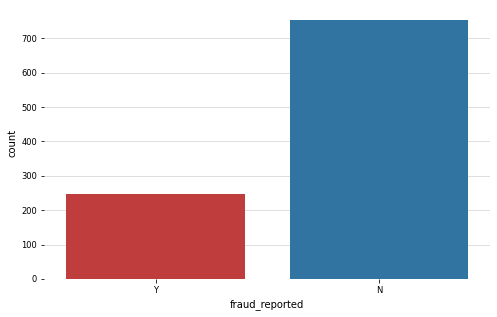

In [115]:
plt.figure(figsize=(8,5))
sns.countplot(df.fraud_reported,palette=['tab:red','tab:blue'])
plt.grid(alpha=0.5,axis='y')
plt.show()

Terlihat dari grafik di atas ada kecenderungan *imbalanced data*, yang mana jumlah nilai "N" jauh lebih banyak dibanding "Y"

## 3.2 Bivariate analysis

In [116]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df_n = df[df['fraud_reported']=='N']
df_y = df[df['fraud_reported']=='Y']

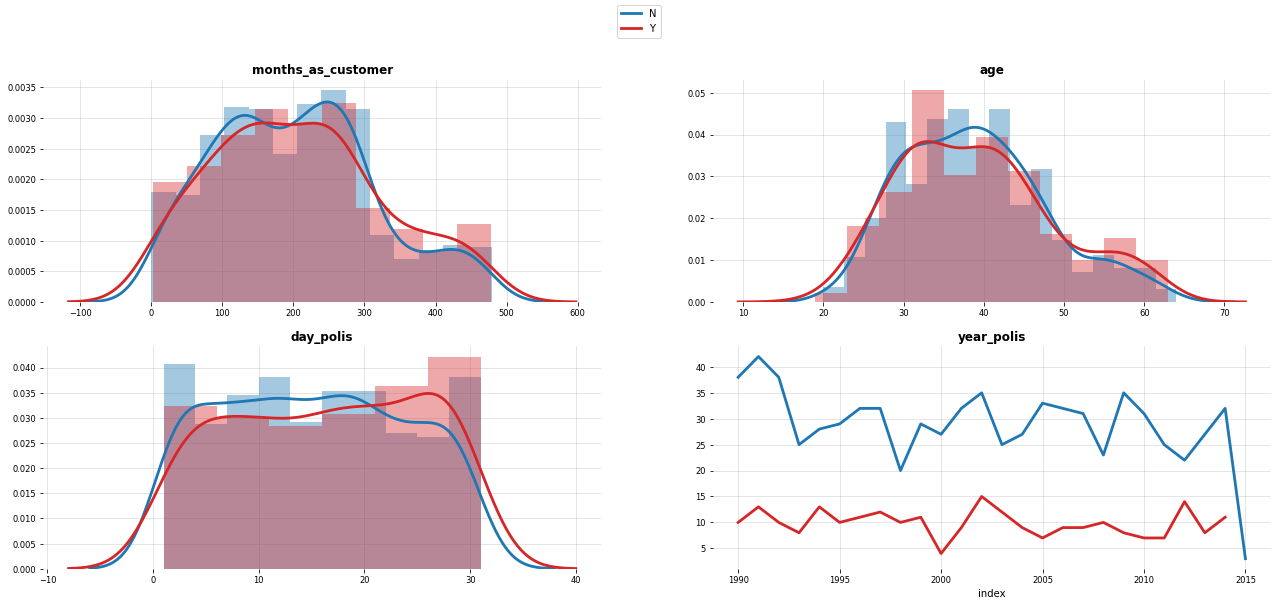

In [117]:
num_col2 = ['months_as_customer','age','day_polis','year_polis']

fig, ax  = plt.subplots(2,2, figsize=(22,9))

sns.lineplot('index','year_polis',data=df_n['year_polis'].value_counts().sort_index().to_frame().reset_index(),ax=ax[1,1],color='tab:blue', label='N',legend=False)
sns.lineplot('index','year_polis',data=df_y['year_polis'].value_counts().sort_index().to_frame().reset_index(),ax=ax[1,1],color='tab:red', label='Y',legend=False)
ax[1,1].set_ylabel('')
ax[1,1].set_title('year_polis', fontweight=550)
fig.legend(loc='upper center')

for a,b in zip(num_col2[:-1],[(0,0),(0,1),(1,0)]):
    plot_numeric(a,b,'tab:blue',data=df_n)
    plot_numeric(a,b,'tab:red',data=df_y)

plt.grid(alpha=0.4)

- dari segi distribusi data kolom "months_as_customer", "age", dan "day_polis", tidak ada perbedaan yang signifikan antara customer yang dilaporkan fraud dengan yang tidak
- dari segi trend line, customer yang dilaporkan fraud dan juga tidak hampir sama. Selain itu, tidak ada customer yang memiliki tanggal polis pada tahun 2015 yang dilaporkan fraud

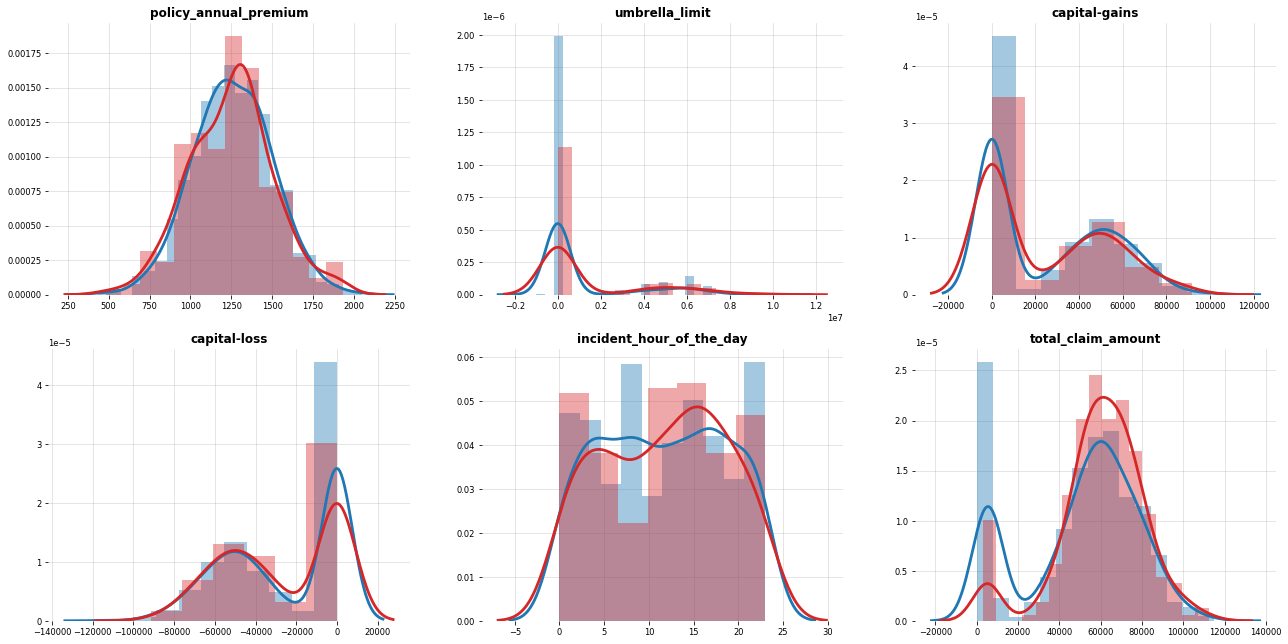

In [118]:
fig, ax  = plt.subplots(2,3, figsize=(22,11))

for a,b in zip(num_col,num_ax):
    plot_numeric(a,b,'tab:blue',data=df_n)
    plot_numeric(a,b,'tab:red',data=df_y)

Sekilas, dari keenam variable di atas, tidak ada perbedaan yang cukup signifikan antara customer yang dilaporkan fraud maupun tidak

Akan tetapi, pada indikator jam insiden, customer yang mengalami insiden antara jam 6 hingga 9 pagi cenderung merupakan customer yang tidak terlaporkan sebagai fraud

- Selain itu, total klaim yang didapat oleh para customer yang dilaporkan fraud cenderung lebih banyak dibanding mereka yang tidak terlaporkan
- Customer yang memiliki nilai 0 pada kolom capital loss dan capital gain banyak dikontribusi oleh mereka yang tidak dilaporkan fraud

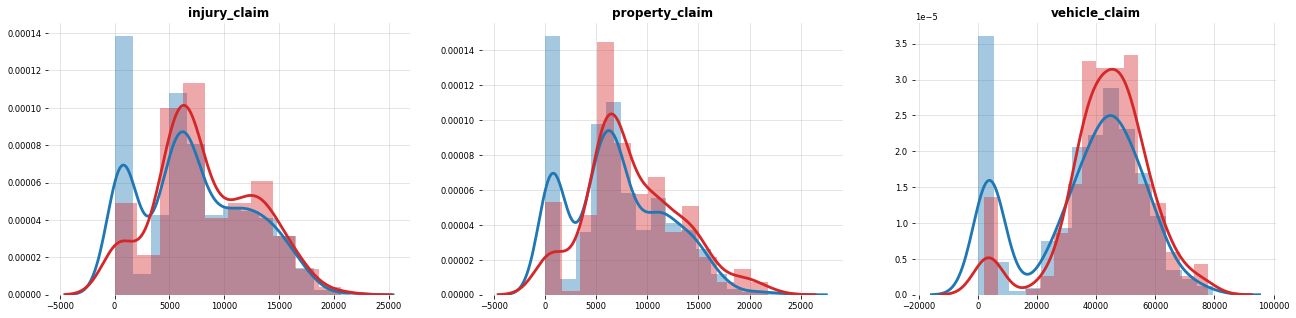

In [119]:
fig, ax  = plt.subplots(1,3, figsize=(22,5))
for x,y in zip(num_col1,[i for i in range(3)]):
    plot_numeric(x,y,data=df_n,color='tab:blue')
    plot_numeric(x,y,data=df_y,color='tab:red')

banyak dari customer yang dilaporkan fraud jumlahnya cenderung lebih banyak mendapat ketiga klaim di atas dibanding mereka yang tidak fraud

customer yang dilaporkan tidak fraud cenderung banyak tidak mendapat ketiga klaim di atas

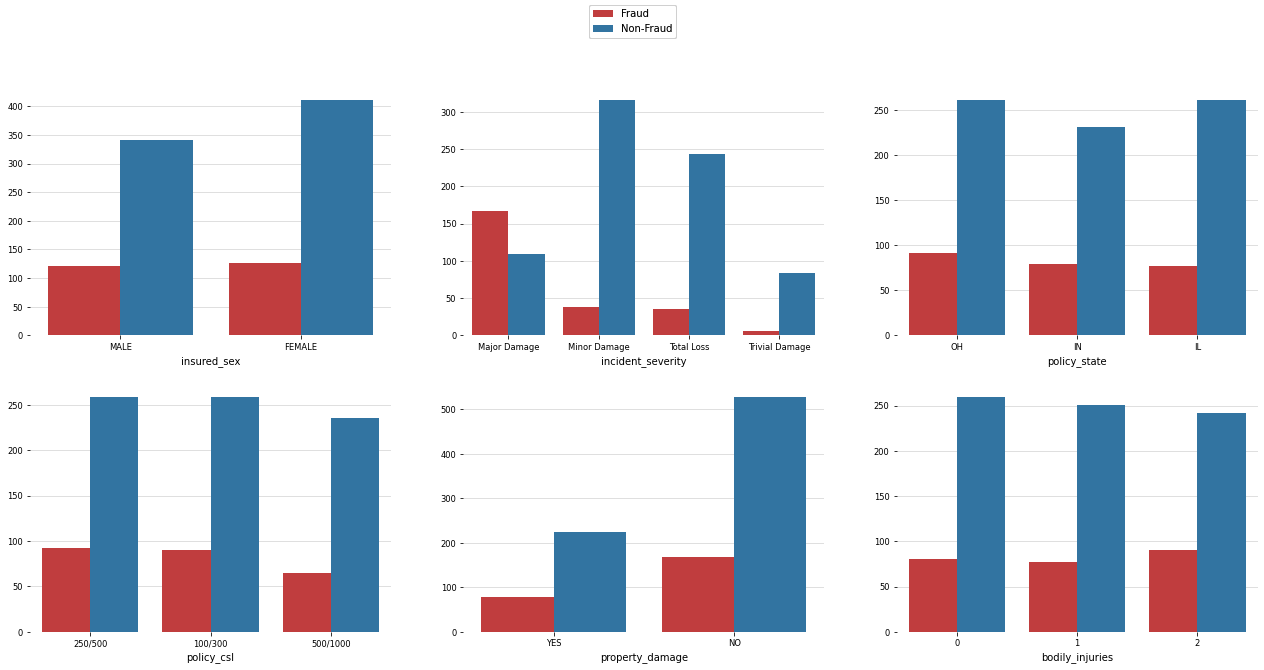

In [120]:
cat_col = ['insured_sex','incident_severity','policy_state','policy_csl','property_damage','bodily_injuries']
fig, ax = plt.subplots(2,3,figsize=(22,10))
for i, j in zip(cat_col,num_ax):
    sns.countplot(i,data=df,hue='fraud_reported',ax=ax[j],palette=['tab:red','tab:blue'])
    ax[j].set_ylabel('')
    ax[j].grid(alpha=0.5,axis='y')
    ax[j].legend([],[], frameon=False)
    fig.legend(['Fraud','Non-Fraud'], loc='upper center')

- customer yang mengalami **major damage** cenderung mereka yang dilaporkan **fraud**
- sisanya, perbandingan antar satu value dengan yang lainnya untuk customer fraud dan tidak fraud memiliki pola yang serupa

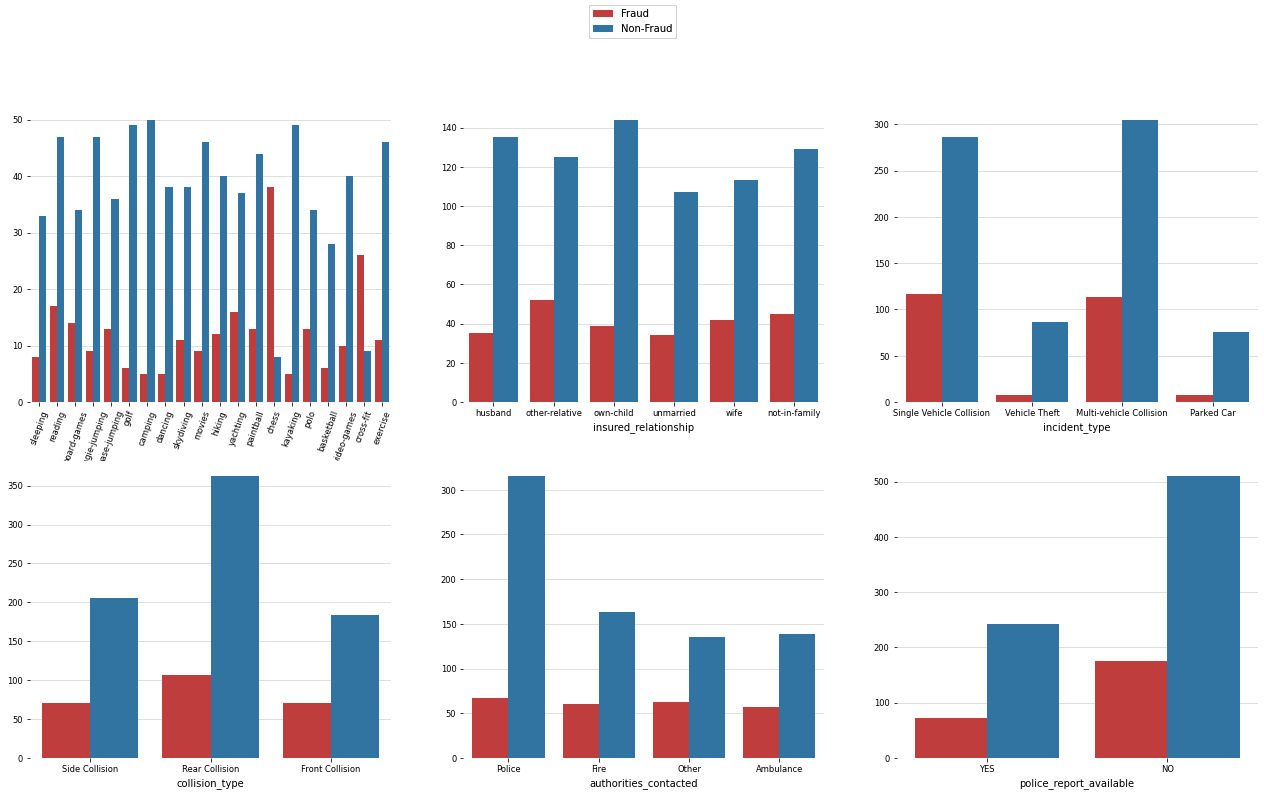

In [121]:
cat_col2 = ['insured_hobbies','insured_relationship','incident_type','collision_type','authorities_contacted','police_report_available']
fig, ax = plt.subplots(2,3,figsize=(22,12))
for i, j in zip(cat_col2,num_ax):
    sns.countplot(i,data=df,hue='fraud_reported',ax=ax[j],palette=['tab:red','tab:blue'],orient='h')
    ax[j].set_ylabel('')
    ax[j].grid(alpha=0.5,axis='y')
    ax[j].legend([],[], frameon=False)
    fig.legend(['Fraud','Non-Fraud'], loc='upper center')
    ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation=70)

- customer yang memiliki hobby *chess* dan *cross-fit* cenderung dilaporkan fraud
- tipe insiden yang dialami customer fraud pada kategori *vehicle theft* dan *parked car* cenderung sedikit dibanding tipe insiden lainnya
- Baik yang dilaporkan fraud maupun tidak, mereka cenderung tidak ada laporan dari polisi
- Rear collision menjadi kategory collison type terbanyak untuk kedua jenis customer, fraud dan non-fraud

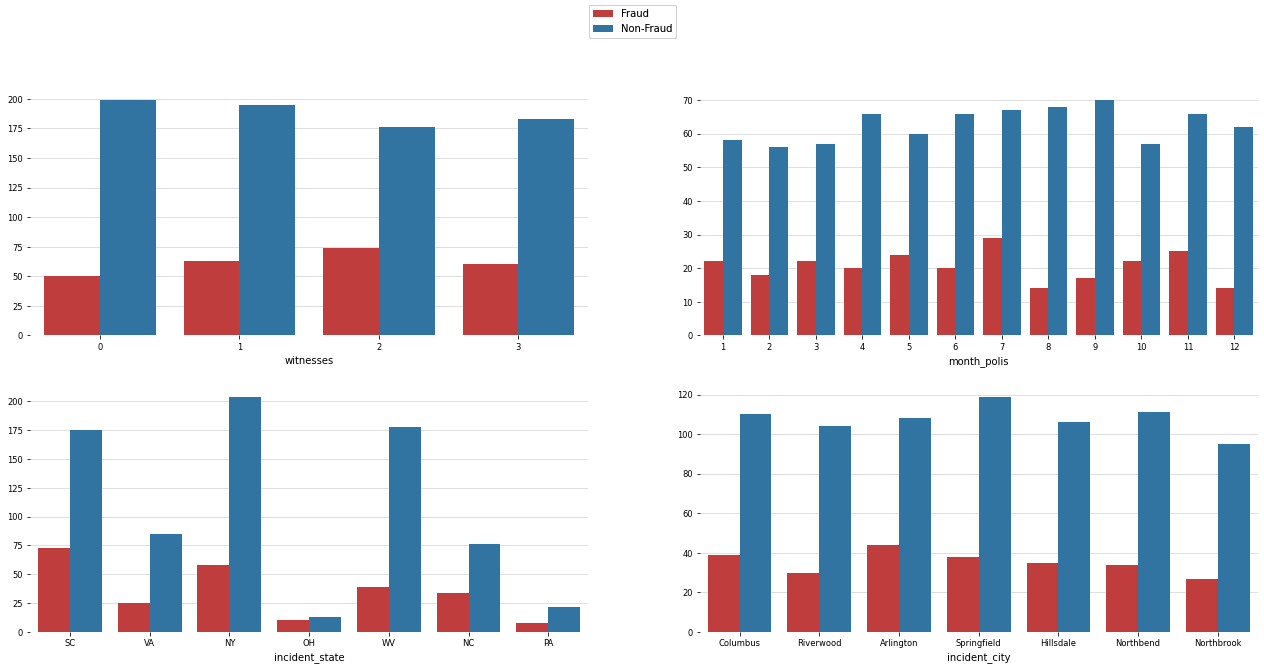

In [122]:
cat_col3 = ['witnesses','month_polis','incident_state','incident_city']
fig, ax = plt.subplots(2,2,figsize=(22,10))
for i, j in zip(cat_col3,[(0,0),(0,1),(1,0),(1,1)]):
    sns.countplot(i,data=df,hue='fraud_reported',ax=ax[j],palette=['tab:red','tab:blue'])
    ax[j].set_ylabel('')
    ax[j].grid(alpha=0.5,axis='y')
    ax[j].legend([],[], frameon=False)
    fig.legend(['Fraud','Non-Fraud'], loc='upper center')

- pada kolom witnesses dan incident_city tidak terdapat perbedaan yang signifikan untuk para customer yang dilaporkan fraud maupun tidak pada setiap value-nya
- pada month polis, mereka yang memiliki bulan polis di bulan juli menjadi nilai yang paling banyak para customer dilaporkan fraud. Lalu turun ke bulan agustus dan trennya naik hingga ke para customer yang memiliki month polis di bulan november
- terdapat perbandingan yang sedikit pada customer yang dilaporkan fraud dan tidak pada state OH 

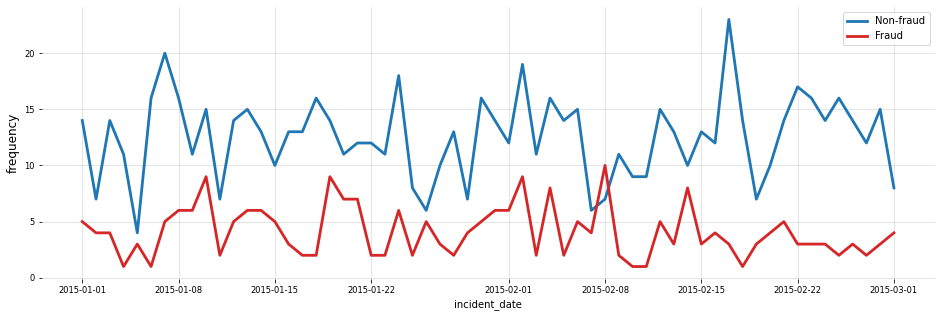

In [123]:
sns.lineplot(x='incident_date',y='months_as_customer',data=df_n.groupby(['incident_date']).count()['months_as_customer'].reset_index(),label='Non-fraud')
sns.lineplot(x='incident_date',y='months_as_customer',data=df_y.groupby(['incident_date']).count()['months_as_customer'].reset_index(),label='Fraud',color='tab:red')
plt.ylabel('frequency',fontsize=12)
plt.grid(alpha=0.4)

secara keseluruhan, garis tren customer yang dilaporkan fraud maupun tidak memiliki kemiripan. Terdapat satu kejadian khusus, kecelakaan yang terjadi pada tanggal 8 Februari cenderung mereka yang dilaporkan fraud

# 3

In [124]:
df.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   

  incident_date             incident_type  collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision  Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city incident_location  \
0                Police             SC      Columbus    9935 4th Drive   
1                Police             VA     Riverwood      6608 MLK Hwy   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year fraud_reported  year_polis  month_polis  day_polis  
0       2004              Y        2014           10         17  
1       2007              Y        2006            6         27

In [155]:
df_new = df.drop(['policy_number','policy_bind_date','insured_occupation','insured_hobbies','auto_make','auto_model','incident_date','incident_location','incident_city'],axis=1)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df_new.select_dtypes('object').nunique()[df_new.select_dtypes('object').nunique() == 2].index:
    df_new[col] = encoder.fit_transform(df_new[col])

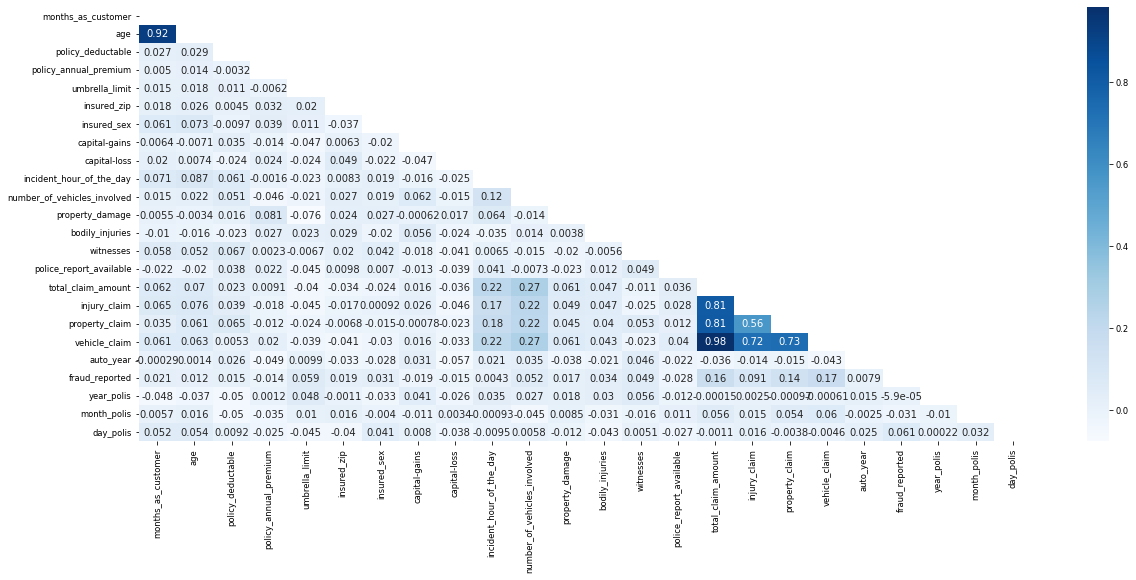

In [161]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df_new.corr(), dtype=bool))
sns.heatmap(df_new.corr(),annot=True,cmap='Blues',mask=mask)
plt.show()

In [162]:
df_for_lr = df_new1.drop(['age','injury_claim','property_claim','vehicle_claim'],axis=1)

In [212]:
df_new1 = pd.get_dummies(df_new)

from sklearn.model_selection import train_test_split, GridSearchCV

X = df_new1.drop('fraud_reported',axis=1)
y = df_new1.fraud_reported
X_lr = df_for_lr.drop('fraud_reported',axis=1)
y_lr = df_for_lr.fraud_reported

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=0, stratify=y_lr)

In [213]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [214]:
from sklearn.metrics import classification_report, roc_curve,roc_auc_score

pd.DataFrame(classification_report(y_test_lr, lr.predict(X_test_lr), target_names=['0','1'], output_dict=True))

0     1  accuracy   macro avg  weighted avg
precision    0.755000   0.0     0.755    0.377500      0.570025
recall       1.000000   0.0     0.755    0.500000      0.755000
f1-score     0.860399   0.0     0.755    0.430199      0.649601
support    151.000000  49.0     0.755  200.000000    200.000000

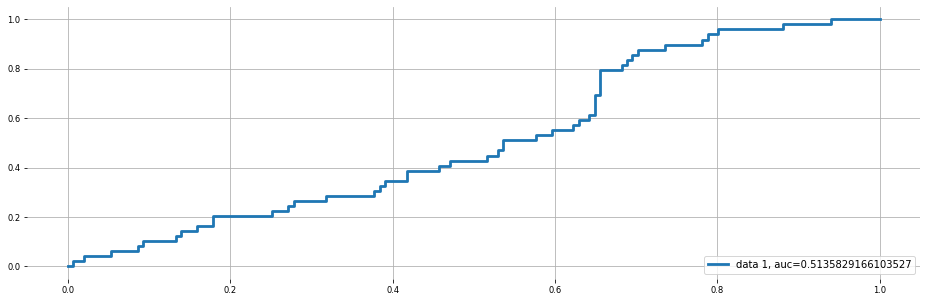

In [215]:
fpr, tpr, _ = roc_curve(y_test_lr, lr.predict_proba(X_test_lr)[::,1])
auc = roc_auc_score(y_test_lr, lr.predict_proba(X_test_lr)[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [216]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [217]:
pd.DataFrame(classification_report(y_test, knn.predict(X_test), target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.770492   0.411765      0.74    0.591128      0.682604
recall       0.933775   0.142857      0.74    0.538316      0.740000
f1-score     0.844311   0.212121      0.74    0.528216      0.689425
support    151.000000  49.000000      0.74  200.000000    200.000000

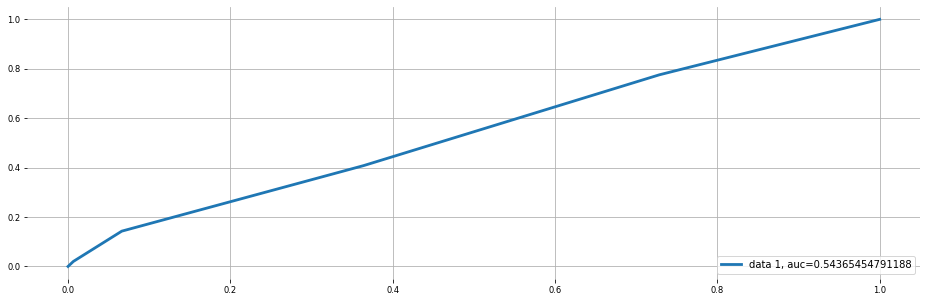

In [218]:
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[::,1])
auc = roc_auc_score(y_test, knn.predict_proba(X_test)[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [219]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [220]:
pd.DataFrame(classification_report(y_test, rf.predict(X_test), target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.801205   0.470588     0.745    0.635897      0.720204
recall       0.880795   0.326531     0.745    0.603663      0.745000
f1-score     0.839117   0.385542     0.745    0.612329      0.727991
support    151.000000  49.000000     0.745  200.000000    200.000000

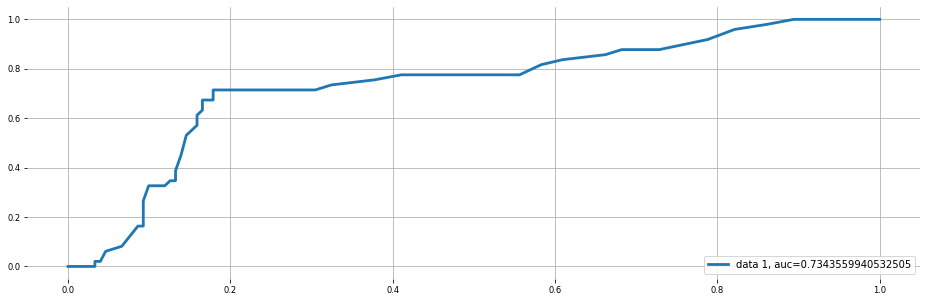

In [221]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[::,1])
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [222]:
# XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [223]:
pd.DataFrame(classification_report(y_test, xgb.predict(X_test), target_names=['0','1'], output_dict=True))

0          1  accuracy   macro avg  weighted avg
precision    0.837500   0.575000     0.785    0.706250      0.773187
recall       0.887417   0.469388     0.785    0.678402      0.785000
f1-score     0.861736   0.516854     0.785    0.689295      0.777240
support    151.000000  49.000000     0.785  200.000000    200.000000

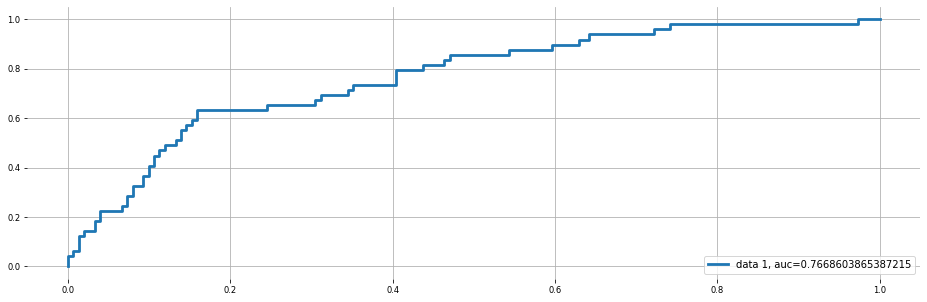

In [226]:
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[::,1])
auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [248]:
lr_params = {'penalty': ['elasticnet', 'l2'],
             'fit_intercept': [True,False],
             'C': [0.25, 0.5, 0.75, 1.0]
            }

knn_params = {'n_neighbors':[i for i in range(2,6)],    
              'p':[1,2]
             }

rf_params = {'n_estimators':[10,50,100,500],
             'criterion': ['gini', 'entropy'],
             'max_depth': [3,5,10, None],
             'max_features': ['sqrt', 'log2']    
}

xgb_params = {'n_estimators': [10, 50, 100],
'max_depth': [3,5,10,None],
'learning_rate': [0.1, 0.05, 0.01],
'grow_policy': ['depthwise', 'lossguide']

    
    
    
}

In [244]:
lr1 = LogisticRegression()
gsc= GridSearchCV(lr1,lr_params,cv=5,n_jobs=-1)
gsc.fit(X_train_lr,y_train_lr)

print(gsc.score(X_test_lr,y_test_lr))
print(gsc.best_params_)

0.755
{'C': 0.25, 'fit_intercept': True, 'penalty': 'l2'}


In [245]:
knn1 =KNeighborsClassifier()
gsc= GridSearchCV(knn1,knn_params,cv=5,n_jobs=-1)
gsc.fit(X_train,y_train)

print(gsc.score(X_test,y_test))
print(gsc.best_params_)

0.75
{'n_neighbors': 4, 'p': 2}


In [246]:
rf1 = RandomForestClassifier()
gsc= GridSearchCV(rf1,rf_params,cv=5,n_jobs=-1)
gsc.fit(X_train,y_train)

print(gsc.score(X_test,y_test))
print(gsc.best_params_)

0.765
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}


In [249]:
xgb1 = XGBClassifier()
gsc= GridSearchCV(xgb1,xgb_params,cv=5,n_jobs=-1)
gsc.fit(X_train,y_train)

print(gsc.score(X_test,y_test))
print(gsc.best_params_)

# 5 Model terbaik : XGBoost

# 6 LIME

In [252]:
from lime.lime_tabular import LimeTabularExplainer

In [254]:
explainer = LimeTabularExplainer(training_data=np.array(X_train),
        feature_names= X_train.columns,
        class_names=["no_fraud","fraud"],
        mode='classification',
        verbose=True,
        random_state=42)

In [261]:
expXGB = explainer.explain_instance(data_row = X_train.iloc[72],
                                    predict_fn = gsc.best_estimator_.predict_proba,
                                    num_features=15)
expXGB.show_in_notebook(show_table=True)

Intercept 0.3700568929671773
Prediction_local [0.53150006]
Right: 0.64486307


data dari nomor plat 235220 tidak memiliki indikasi fraud, karena tidak memiliki factor factor penyebab utama yang mengindikasikan fraud

In [259]:
expXGB = explainer.explain_instance(data_row = X_train.iloc[563],
                                    predict_fn = gsc.best_estimator_.predict_proba,
                                    num_features=15)
expXGB.show_in_notebook(show_table=True)

Intercept 0.5433349735340175
Prediction_local [0.3433078]
Right: 0.3354954


probability untuk fraud sebesar 0.60, hal ini karena incident_severity merupakan tingkat major_damage yang memiliki kemungkinan fraud sangat besar dan vahicle claim sebesar 54160

In [262]:
expXGB = explainer.explain_instance(data_row = X_train.iloc[20],
                                    predict_fn = gsc.best_estimator_.predict_proba,
                                    num_features=15)
expXGB.show_in_notebook(show_table=True)

Intercept 0.5632152808222509
Prediction_local [0.33471945]
Right: 0.3354954


kemungkinan tidak fraud lebih besar, berdasarkan ciri ciri kolom yang menyebabkan fraud tidak terpenuhi, seperti tidak memiliki hobbies chees dan cross-fit, incident severity tingkat 3 atau total_loss yang memiliki kemungkinan fraud kecil